<a href="https://colab.research.google.com/github/antreev-brar/ML-projects/blob/master/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
import numpy as np
import pandas as pd
import sys
import scipy as sp
import IPython 
import matplotlib.pyplot as plt


In [62]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [63]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train ,X_test , Y_train , Y_test = train_test_split(data.data,data.target ,stratify = data.target ,random_state = 43)
tree = DecisionTreeClassifier(random_state =9)
tree = tree.fit(X_train , Y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, Y_train)))
print("accuracy on test_set :{}".format(tree.score(X_test, Y_test)))

Accuracy on training set: 1.000
accuracy on test_set :0.9370629370629371


In [65]:
print(tree.get_depth())

7


In [66]:
print(data.data.shape[1])

30


In [0]:
#this doesnt work
from sklearn.tree import export_graphviz
export_graphviz(tree , out_file = 'tree.dot' , class_names =data.target_names , feature_names = data.feature_names , impurity =False , filled =True )
import graphviz
with open ("tree.dot") as f:
  dot_graph = f.read()
  graphviz.Source(dot_graph)

In [68]:
print ("importances are :{}".format(tree.feature_importances_))

importances are :[0.         0.0240831  0.00931787 0.         0.         0.00860111
 0.00131378 0.         0.         0.         0.         0.00668975
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03825736 0.72611333 0.03105379
 0.         0.00980885 0.00326886 0.14149219 0.         0.        ]


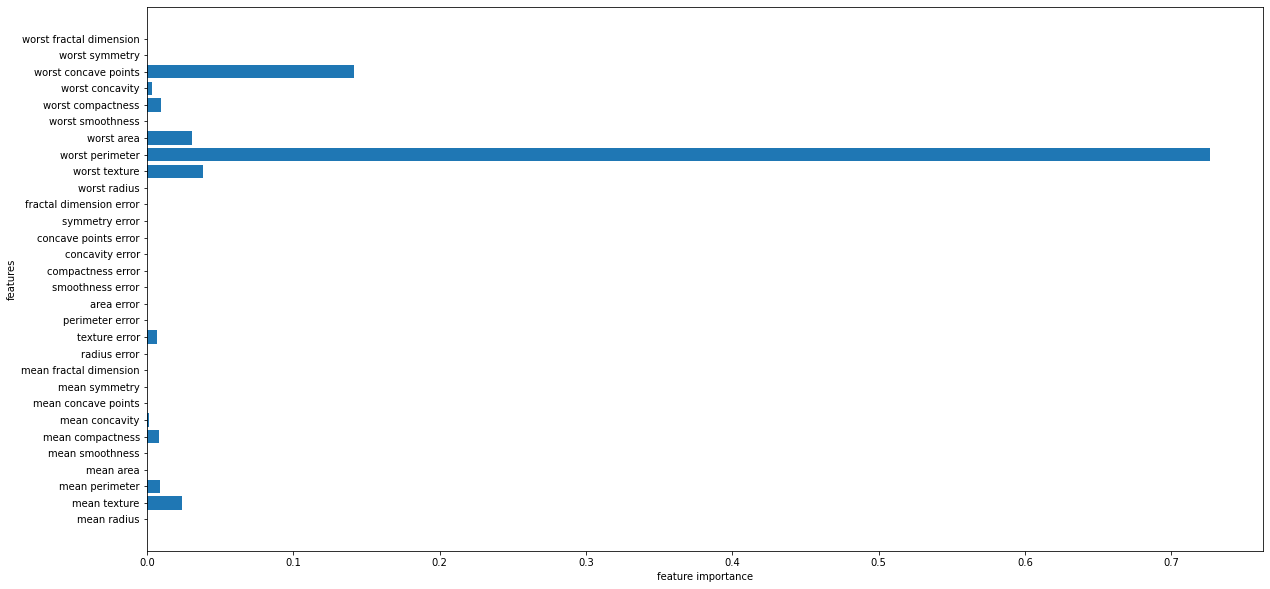

In [69]:
def plot_something(model):
  plt.figure(figsize=(20,10))
  n_features = data.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_ , align ='center' )
  plt.yticks(np.arange(n_features) , data.feature_names)
  plt.xlabel("feature importance")
  plt.ylabel("features")
  
plot_something(tree)